# Qiskit 3 - 2020/2021
&nbsp;

### Contents
1. [Deutsch-Jozsa Algoritm](#dja)
2. [Grover's Algorithm](#ga0)
3. [Grover's Algorithm - Exactly-1 3-SAT problem](#ga1)
&nbsp;

#### Module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

&nbsp;

## 1. Deutsch–Jozsa algorithm<a id='dja'></a>

&nbsp;

### Problem formulation

Consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an array of $n$  bits into either 0 or 1. We do not know the logic behind it. **We know that it is either constant or balanced**:
- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half the input value and 1 for the other half


For the case that $n=1$ we have $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit into either 0 or 1. We are given a black box, an **oracle**, that takes as input a bit and outputs the unknown value.
<p>

<img src="https://avalon-lang.readthedocs.io/en/latest/_images/classical.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">
    
To answer this question classically, we would always need two function invocations. We could do $f(0)$ and $f(1)$ and see if it is either constant or balanced. 

Before transforming it into a quantum problem, we need our black box to be an oracle which allows for **reversible computation**, like so:
<p>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Deutsch-Jozsa-algorithm-quantum-circuit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

### Algorithm


Let us imagine the following procedure:
**1.** We begin with two qubits, $|a \rangle$ in state $|0\rangle$ and $| b \rangle$ in state $|1\rangle$: $\; |01\rangle$.

$$\lvert \psi_0 \rangle = \lvert 0\rangle^{\oplus n} \lvert 1 \rangle \mbox{, where } n = 1$$

**2.** We apply a Hadamard to each qubit $H^{\oplus n+1}$.

$$\sum_x \frac{\lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle)}{\sqrt{2}} \right]$$

The result is $\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

**3.** We now call our oracle, which maps $|ab\rangle$ or $|a\rangle |b\rangle$ (easier to interpret) into $|a\rangle |b \oplus f(a)\rangle$ the result is:

$$ \frac{1}{\sqrt{2^{n+1}}} \sum_x \lvert x \rangle (\lvert f(x)\rangle - \lvert 1 \oplus f(x)\rangle )$$

$$\frac{1}{2}( \; |0\rangle |0\oplus f(0)\rangle \;-\; |0\rangle |1\oplus f(0)\rangle \;+\; |1\rangle |0\oplus f(1)\rangle \;-\; |1 \rangle |1\oplus f(1)\rangle \;)$$

We can now use the following equivalence:

$$|0 \oplus a\rangle - |1 \oplus a\rangle =  (-1)^a(|0\rangle - |1\rangle)$$

To replace above and get:

$$\frac{1}{2}[|0\rangle \,\otimes \, (-1)^{f(0)}(|0\rangle - |1\rangle)\; +\; |1\rangle \,\otimes \,(-1)^{f(1)}(|0\rangle - |1\rangle)]$$

This quantum state can be separated into the product state:

$$ \sum_{x} \frac{(-1)^{f(x)} \lvert x \rangle}{\sqrt{2^n}} \left[ \frac{(\lvert 0 \rangle - \lvert 1 \rangle)}{\sqrt{2}} \right] $$

$$ [\frac{1}{\sqrt{2}} (-1)^{f(0)} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(1)}| 1 \rangle] \; \otimes \; [\frac{1}{\sqrt{2}} | 0 \rangle - \frac{1}{\sqrt{2}} | 1 \rangle] $$

Our second qubit can now be ignored, and what remains is our first qubit, which contains both $f(0)$ and $f(1)$ - both images of $f$ with a single pass over the oracle. This can further be simplified as:

$$(-1)^{f(0)}(\frac{1}{\sqrt{2}} | 0 \rangle + \frac{1}{\sqrt{2}} (-1)^{f(0) \oplus f(1)} | 1 \rangle)$$


**4.** Lastly, we apply a Hadamard gate on our qubit and we arrive at:

$$\sum_{x,y} \frac{(-1)^{f(x) \oplus (x\cdot y)} \lvert x \rangle}{2^n} \left[ \frac{(\lvert 0 \rangle -\lvert 1 \rangle )}{\sqrt{2}} \right]$$

$$(-1)^{f(0)} |f(0) \oplus f(1)\rangle$$

**5.** Measure the first $n$ qubits. The probability of measuring $\lvert 0\rangle \oplus n$:

$$ \left| \sum_x \frac{(-1)^{f(x)}}{2^n} \right| ^2 $$

Let’s start with some intuition of how this algorithm works, to do that we are going to recall one of the famous problems that classical physics could not explain,the double slit experiment.
This experiment makes clear that some particles (like photons, protons or electrons) have a wave-like behavior, creating interference patterns.
In other words, the probability of a particle hitting a specific detector depends on the type of interference in the path. If the interference is destructive the probability is small, and if it is constructive there is a high probability of hitting the detector.

The Deutsch-Jozsa algorithm sees the constant function as the one that has constructive interference and the balanced one as the one with destructive interference.
Therefore, we can expect to see a probability close to $100\%$ when the function is constant and a different result from the balanced function.


* When $f$ is constant the probability is $1$ (constructive interference);
* When $f$ is balanced the probability is $0$ (destructive interference).

In other words

- if f is constant ($00$ or $11$) $\rightarrow$ output is $0$ (xor is 0)
- if f is balanced ($01$ or $10$) $\rightarrow$ output is $\pm 1$ (xor is 1)

Which, in fact, means that we can do a *single pass* over the oracle gate discover whether it is constant or balanced, an impossible feat in classical computing.

Generalizing for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, a classical algorithm would need $2^{n-1}+1$ passes, while **a quantum function would still require 1 pass**.

<p>
<p>

### Quantum parallelism

A quantum register has the ability to exist in a superposition of base states - each one may be thought of as a single argument to a function. 

A function performed on the register in a superposition of states is thus performed on each of the components of the superposition, _while only being applied once_.

<div class="alert alert-block alert-warning">

**Exercise 1 - Building a circuit for the Deutsch-Josza algorithm**
    
1.1. with constant $f$
<p>
1.2. with balanced $f$
<p>
1.3. Verify your circuit
</div>

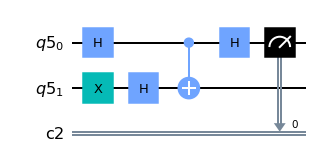

In [5]:
#0 Inicializar
qr, cr = QuantumRegister(2), ClassicalRegister(1)

deutsch_circ = QuantumCircuit(qr, cr)

#1
deutsch_circ.x(qr[1])

#2
deutsch_circ.h(qr)

#3 
deutsch_circ.cx(qr[0],qr[1])

#4
deutsch_circ.h(qr[0])

#5
deutsch_circ.measure(qr[0],cr[0])

deutsch_circ.draw(output='mpl')

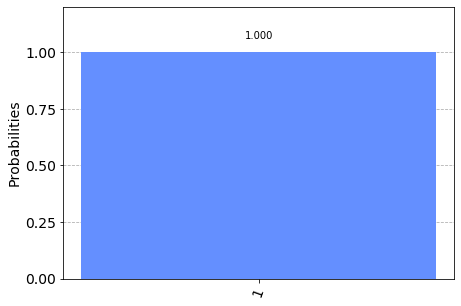

In [6]:
backend = Aer.get_backend('qasm_simulator')

job_dj = execute(deutsch_circ,backend)

result_dj = job_dj.result()
counts_dj = result_dj.get_counts(deutsch_circ)

plot_histogram(counts_dj)

**Refs**

* [Deutsch-Josza Algorithm - Qiskit](https://qiskit.org/textbook/ch-algorithms/deutsch-josza.html)
* [Lesson 38 Quantum Computing, Deutsch's Problem](https://www.youtube.com/watch?v=5xsyx-aNClM)

&nbsp;

## 2. Grover's algorithm<a id='ga0'></a>

&nbsp;

Grover's algorithm demonstrates the speed advantage a quantum computer has over a classical computer in searching databases. This algorithm can speed up an unstructured search problem quadratically, but its uses extend beyond that; it can serve as a general trick or subroutine to obtain quadratic run time improvements for a variety of other algorithms. This is called the amplitude amplification trick.

&nbsp;

#### Unstructured Search

Suppose you are given a large list of $N$ items. Among these items there is one item with a unique property that we wish to locate; we will call this one the winner $w$. Think of each item in the list as a box of a particular color. Say all items in the list are gray except the winner $w$, which is pink.

<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_list.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

To find the pink box -- the *marked item* -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them. On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is indeed a substantial time-saver for finding marked items in long lists. Additionally, the algorithm does not use the list's internal structure, which makes it *generic;* this is why it immediately provides a quadratic quantum speed-up for many classical problems.

&nbsp;

#### Oracle

How will the list of items be provided to the quantum computer? A common way to encode such a list is in terms of a function $f$ which returns $f(x) = 0$ for all unmarked items $x$ and $f(w) = 1$ for the winner. To use a quantum computer for this problem, we must provide the items in superposition to this function, so we encode the function into a unitary matrix called an *oracle*. First we choose a binary encoding of the items $x, w \in \{0,1\}^n$ so that $N = 2^n$; now we can represent it in terms of qubits on a quantum computer. Then we define the oracle matrix $U_f$ to act on any of the simple, standard basis states $| x \rangle$ by $U_f | x \rangle = (-1)^{f(x)}  |  x \rangle.$

We see that if $x$ is an unmarked item, the oracle does nothing to the state. However, when we apply the oracle to the basis state $| w \rangle$, it maps $U_f | w \rangle = -| w \rangle$. Geometrically, this unitary matrix corresponds to a reflection about the origin for the marked item in an $N = 2^n$ dimensional vector space.

&nbsp;

#### Amplitude Amplification

So how does the algorithm work? Before looking at the list of items, we have no idea where the marked item is. Therefore, any guess of its location is as good as any other, which can be expressed in terms of a
uniform superposition:

&nbsp;

$|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x
\rangle.$

&nbsp;

If at this point we were to measure in the standard basis $\{ | x \rangle \}$, this superposition would collapse, according to the fifth quantum law, to any one of the basis states with the same probability of $\frac{1}{N} = \frac{1}{2^n}$. Our chances of guessing the right value $w$ is therefore $1$ in $2^n$, as could be expected. Hence, on average we would need to try about $N = 2^n$ times to guess the correct item.

Enter the procedure called amplitude amplification, which is how a quantum computer significantly enhances this probability. This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitude, so that measuring the final state will return the right item with near-certainty. 

This algorithm has a nice geometrical interpretation in terms of two reflections, which generate a rotation in a two-dimensional plane. The only two special states we need to consider are the winner $| w \rangle$ and the uniform superposition $| s \rangle$. These two vectors span a two-dimensional plane in the vector space $\mathbb{C}^N.$ They are not quite perpendicular because $| w \rangle$ occurs in the superposition with amplitude $N^{-1/2}$ as well.
We can, however, introduce an additional state $|s'\rangle$ that is in the span of these two vectors, which is perpendicular to $| w \rangle$ and is obtained from $|s \rangle$ by removing $| w \rangle$ and
rescaling. 

**Step 1**: The amplitude amplification procedure starts out in the uniform superposition $| s \rangle$, which is easily constructed from $| s \rangle = H^{\otimes n} | 0 \rangle^n$.

<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_step1.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">


The left graphic corresponds to the two-dimensional plane spanned by perpendicular vectors $|w\rangle$ and $|s'\rangle$ which allows to express the initial state as $|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$ where $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$. The right graphic is a bar graph of the amplitudes of the state $| s \rangle$ for the case $N = 2^2 = 4$. The average amplitude is indicated by a dashed line.

**Step 2**: We apply the oracle reflection $U_f$ to the state $|s\rangle$.

<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_step2.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

Geometrically this corresponds to a reflection of the state $|s\rangle$ about $|s'\rangle$. This transformation means that the amplitude in front of the $|w\rangle$ state becomes negative, which in turn means that the average amplitude has been lowered.

**Step 3**: We now apply an additional reflection $U_s$ about the state $|s\rangle$: $U_s = 2|s\rangle\langle s| - \mathbb{1}$. This transformation maps the state to $U_s U_f| s \rangle$ and completes the transformation. 

<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_step3.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

Two reflections always correspond to a rotation. The transformation $U_s U_f$ rotates the initial state $|s\rangle$ closer towards the winner $|w\rangle$. The action of the reflection $U_s$ in the amplitude bar diagram can be understood as a reflection about the average amplitude. Since the average amplitude has been lowered by the first reflection, this transformation boosts the negative amplitude of $|w\rangle$ to roughly three times its original value, while it decreases the other amplitudes. We then go to **step 2** to repeat the application. This procedure will be repeated several times to zero in on the winner. 

After $t$ steps we will be in the state $|\psi_t\rangle$ where: $| \psi_t \rangle = (U_s U_f)^t  | s \rangle.$

How many times do we need to apply the rotation? It turns out that roughly $\sqrt{N}$ rotations suffice. This becomes clear when looking at the amplitudes of the state $| \psi \rangle$. We can see that the amplitude of $| w \rangle$ grows linearly with the number of applications $\sim t N^{-1/2}$. However, since we are dealing with amplitudes and not probabilities, the vector space's dimension enters as a square root. Therefore it is the amplitude, and not just the probability, that is being amplified in this procedure.

In the case that there are multiple solutions, $M$, it can be shown that roughly $\sqrt{(N/M)}$ rotations will suffice.

<img src="https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_high_level.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

&nbsp;


<div class="alert alert-block alert-warning">

**Exercise 2 - Building a circuit for the Grover algorithm** for N=4 with only 1 rotation.
    
1.1. Find the State $|01\rangle $
    
Use an ancilla initialized to $|1\rangle$
<p>

1.2. Verify your circuit
    
<p>

*Challenge:* try it without ancilla.

</div>

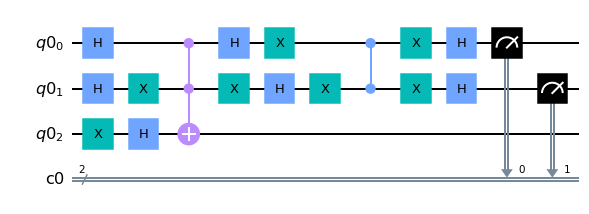

In [2]:
#0
qr, cr = QuantumRegister(3), ClassicalRegister(2)

grover = QuantumCircuit(qr,cr)

#1
grover.x(qr[2])
grover.h(qr)

#2
grover.x(qr[1])
grover.ccx(qr[0],qr[1],qr[2])
grover.x(qr[1])

#3a
grover.h(qr[0])
grover.h(qr[1])
#3b
grover.x(qr[0])
grover.x(qr[1])
#3c
grover.cz(qr[0],qr[1])

#3d
grover.x(qr[0])
grover.x(qr[1])

#3e
grover.h(qr[0])
grover.h(qr[1])

#4
grover.measure(qr[0],cr[0])
grover.measure(qr[1],cr[1])

grover.draw(output='mpl')

**Refs**

* [Grover Algorithm - Qiskit](https://qiskit.org/textbook/ch-algorithms/grover.html)
* [Complete 3-Qubit Grover search on aprogrammable quantum computer](https://www.nature.com/articles/s41467-017-01904-7.pdf)

&nbsp;

## 3. Grover's algorithm - Exactly-1 3-SAT problem<a id='ga1'></a>

&nbsp;

Here, we are going to illustrate the use of Grover search to solve a combinatorial problem called Exactly-1 3-SAT problem. The Exactly-1 3-SAT problem is a NP-complete problem, namely, it is one of the most difficult problems that are interconnected (meaning that if we solve any one of them, we essentially can solve all of them). Unfortunately, there are many natural problems that are NP-complete, such as, the Traveling Salesman Problem (TSP), the Maximum Cut (MaxCut) and so on. Up to now, there is no classical and quantum algorithm that can efficiently solve such NP-hard problems. 

**Quickly simulate circuit**

In [4]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

### Exactly-1 3-SAT problem

The Exactly-1 3-SAT problem is best explained with the following concrete problem. Let us consider a Boolean function $f$ with three Boolean variables $x_1, x_2, x_3$ as below.

$$
f(x_1, x_2, x_3) = (x_1 \vee x_2 \vee \neg x_3) \wedge (\neg x_1 \vee \neg x_2 \vee \neg x_3) \wedge (\neg x_1 \vee x_2 \vee x_3) 
$$

In the above function, the terms on the right-hand side equation which are inside $()$ are called clauses. Each clause has exactly three literals. Namely, the first clause has $x_1$, $x_2$ and $\neg x_3$ as its literals. The symbol $\neg$ is the Boolean NOT that negates (or, flips) the value of its succeeding literal. The symbols $\vee$ and $\wedge$ are, respectively, the Boolean OR and AND. The Boolean $f$ is satisfiable if there is an assignment of $x_1, x_2, x_3$ that evaluates to $f(x_1, x_2, x_3) = 1$ (or, $f$ evaluates to True). The Exactly-1 3-SAT problem requires us to find an assignment such that $f = 1$ (or, True) and there is *exactly* one literal that evaluates to True in every clause of $f$. 

A naive way to find such an assignment is by trying every possible combinations of input values of $f$. Below is the table obtained from trying all possible combinations of $x_1, x_2, x_3$. For ease of explanation, we interchangably use $0$ and False, as well as $1$ and True.  

|x_1 | x_2 | x_3 | f | Comment | 
|------|-------|-------|-----|---------|
| 0    |  0    |  0    |  1  | Not a solution because there are three True literals in the second clause     | 
| 0    |  0    |  1    |  0  | Not a solution because $f$ is False          | 
| 0    |  1    |  0    |  1  | Not a solution because there are two True literals in the first clause        | 
| 0    |  1    |  1    |  1  | Not a solution because there are three True literals in the third clause        | 
| 1    |  0    |  0    |  0  | Not a solution because $f$ is False        | 
| 1    |  0    |  1    |  1  | **Solution**. BINGO!!       | 
| 1    |  1    |  0    |  1  | Not a solution because there are three True literals in the first clause        | 
| 1    |  1    |  1    |  0  | Not a solution because $f$ is False        | 


From the table above, we can see that the assignment $x_1x_2x_3 = 101$ is the solution for the Exactly-1 3-SAT problem to $f$. In general, the Boolean function $f$ can have many clauses and more Boolean variables. 

&nbsp;


<div class="alert alert-block alert-warning">

**Exercise 3.1 - State Initialization**

Begin by implementing a function for state initialization, i.e. implementing the circuit below for an arbitrary number of qubits.

<img src="img/init.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center"> 

</div>

In [ ]:
# Inputs: QuantumCircuit circuit, input register f_in, output register f_out
def input_state(circuit, f_in, f_out):

### A blackbox function to check the assignment of Exactly-1 3-SAT problem

Here, we describe a method to construct a circuit to check the assignment of Exactly-1 3-SAT problem. The circuit can then be used as a blackbox (or, oracle) in Grover search. To design the blackbox, we do not need to know the solution to the problem in advance: it suffices to design a blackbox that checks if the assignment results in $f$ evaluates to True or False. It turns out that we can design such a blackbox efficiently (in fact, any NP-complete problem has the property that although finding the solution is difficult, checking the solution is easy). 

For each clause of $f$, we design a sub-circuit that outputs True if and only if there is exactly one True literal in the clause. Combining all sub-circuits for all clauses, we can then obtain the blackbox that outputs True if and only if all clauses are satisfied with exactly one True literal each.   

For example, let us consider the clause $(x_1 \vee \neg x_2 \vee x_3)$. It is easy to see that $y$ defined as 

$$
y = x_1 \oplus \neg x_2 \oplus x_3 \oplus ( x_1 \wedge \neg x_2 \wedge x_3), 
$$

Note that this clause can be written as [1, -2, 3]

is True if and only if exactly one of $x_1$, $\neg x_2$, and $x_3$ is True. Using two working qubits, $y$ can be computed by the following sub-circuit. Below, $x_1x_2x_3$ is renamed as $q_1q_2q_3$, $q_4$ is used as a working qubit, and $q_5$ is used to store the value of $y$.  

<div class="alert alert-block alert-warning">

**Exercise 3.2 - Blackbox**

1. Implement the circuit below, for the blackbox:

<img src="img/black_box1.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center"> 

Keep in mind that a CCNOT can be decomposed using an ancilla qubit (q4):

<img src="img/cccnot.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="center"> 

2. Compare the circuit outputs with the clausule $(x_1 \vee \neg x_2 \vee x_3)$. How can we generalize the circuit for any Exactly-1 3-SAT clausule? Implement such a routine in the function `sub_oracle` below.

3. Implement a function `blackbox_u_f` that calls `sub_oracle` as many times as there are clausules in the formula.

</div>

In [1]:
# 1.

In [ ]:
# 2. Inputs: ancilliary qubit aux, and clausule, as a list of 3 integers  
def sub_oracle(circuit, f_in, f_outx, aux, clausule):

<div class="alert alert-block alert-warning">

We can check if the subroutine works as intended by printing the circuit for a clause:

</div>

In [ ]:
f_in = QuantumRegister(3)
f_out = QuantumRegister(1)
aux = QuantumRegister(1)
qc = QuantumCircuit(f_in, f_out, aux)
clausula = [1,-2,3]

sub_oracle(qc, f_in, f_out, aux, clausula)
#input_state(qc, f_in, f_out)
qc.draw(output='mpl')

In [ ]:
# 3.
def black_box_u_f(circuit, f_in, f_out, aux, sat_formula):

<div class="alert alert-block alert-warning">

We can check that the oracle works, for the formula above (f should return 1 for x<sub>1</sub> = 1, x<sub>2</sub> = 0, x<sub>3</sub> = 1).

</div>

In [9]:
sat_formula = [[1,2,-3],[-1,-2,-3],[-1,2,3]]

#3 input qubits (3 literals in each clause)
f_in = QuantumRegister(3)
#1 ancilla qubit (ccx decomposition)
aux = QuantumRegister(1)
#output qubits = number of clauses + 1 (final output)
f_out = QuantumRegister(len(sat_formula)+1)

# Create circuit
qc = QuantumCircuit(f_in, aux, f_out)

# Prepare input states, x1=1, x3=1
qc.x(f_in[0])
qc.x(f_in[2])

black_box_u_f(qc, f_in, f_out, aux, sat_formula)

cr = ClassicalRegister(7)
qc.add_register(cr)

qc.measure(f_in[0], cr[0])
qc.measure(f_in[1], cr[1])
qc.measure(f_in[2], cr[2])

qc.measure(f_out[0], cr[3])
qc.measure(f_out[1], cr[4])
qc.measure(f_out[2], cr[5])
qc.measure(f_out[3],cr[6])

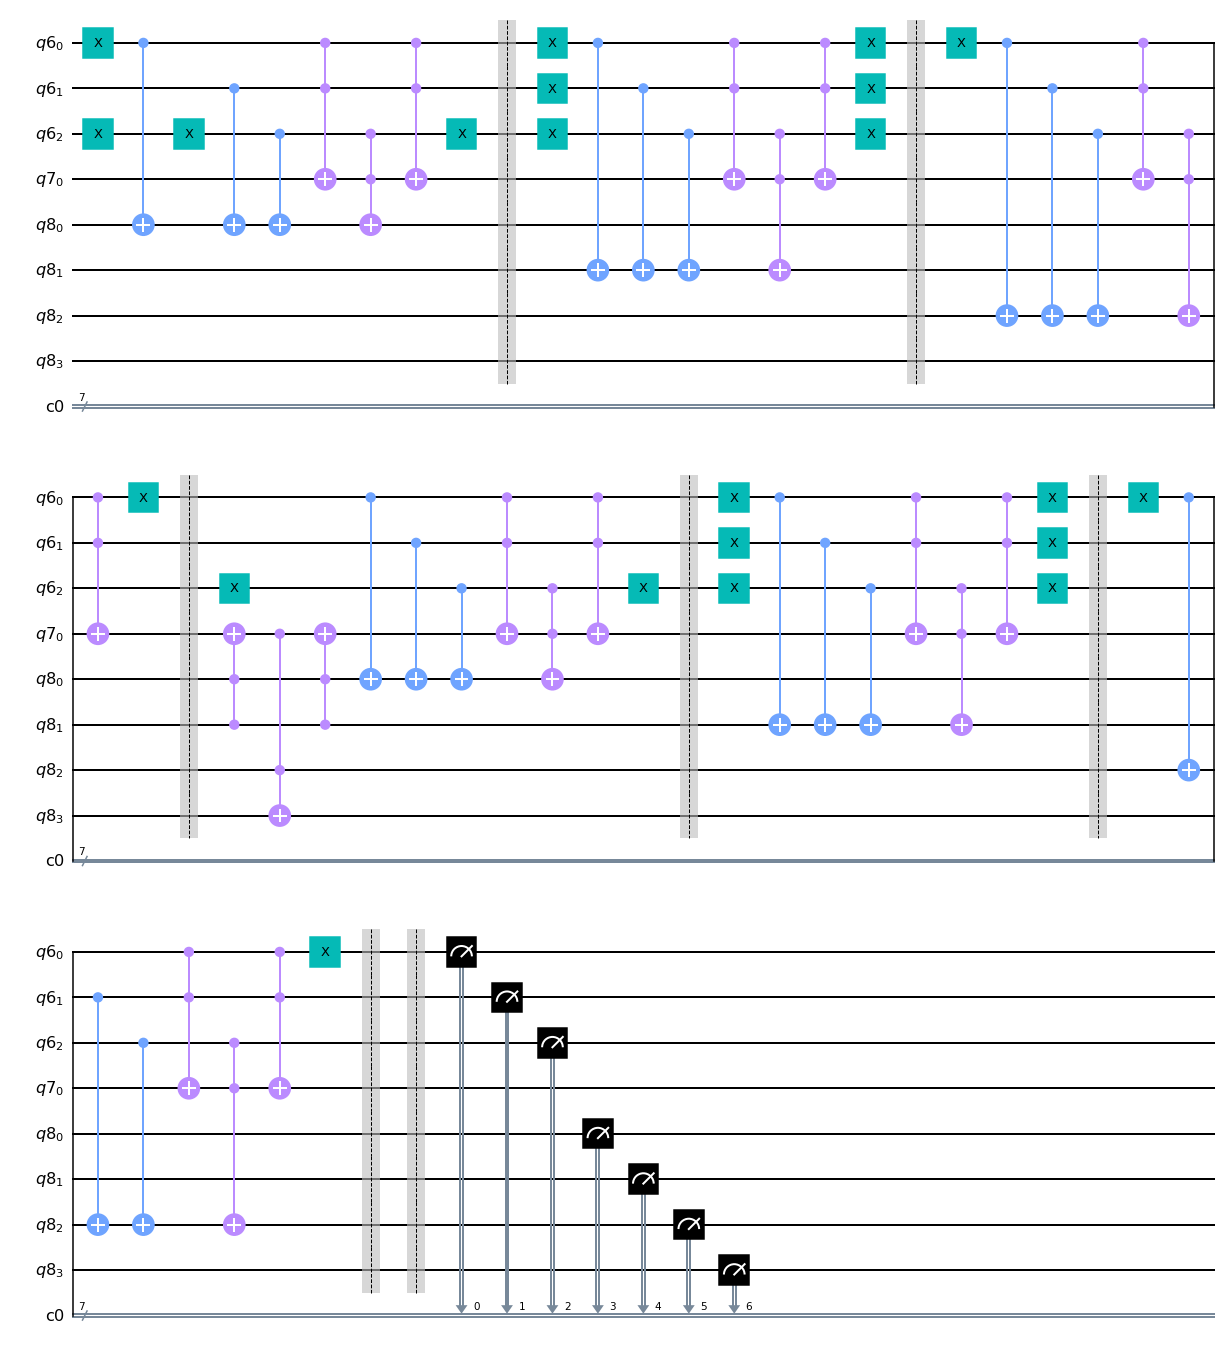

In [10]:
qc.draw(output='mpl')

_To be continued..._

**Refs**

* [An Introduction to Quantum Computing, Without the Physics](https://arxiv.org/abs/1708.03684)
* [Exactly-1 3-satisfiability - wiki](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem#Exactly-1_3-satisfiability)

This notebook is based on an official notebook by Qiskit team, available at https://github.com/qiskit/qiskit-tutorial under the [Apache License 2.0](https://github.com/Qiskit/qiskit-tutorial/blob/master/LICENSE) license. 
Initially done by Giacomo Nannicini and Rudy Raymond (based on [this paper](https://arxiv.org/abs/1708.03684)).